UFCG/CEEI/DEE - Campus de Campina Grande - Disciplina: Controle Analógico

Primeira avaliação - Atividade 4 - Período: 2021.1 - Professor: Saulo O. D. Luiz

**Nome: Filipe Soares Donato**

**Matrícula: 120111402**

Caros alunos e alunas,

Crie uma cópia deste notebook do colab por meio do menu Arquivo / Salvar uma cópia no Drive, e inclua seu nome e matrícula no nome do notebook.

Os itens identificados como (Cálculos à mão) devem ser respondidos à mão no papel ou mesa digitalizadora. É possível anexar a imagem digitalizada neste notebook do colab, ou fazer upload de um pdf na atividade. Por favor não anexem jpg ou png.

Os demais itens podem ser respondidos na forma de código no Python, resultados de cálculos e simulações nas células identificadas como (#Resposta), e texto nas células identificadas como (Resposta) neste notebook do colab.

Realize upload do notebook como arquivo do seu Drive. Por favor, não faça upload do link do arquivo.

Boa sorte!

In [2]:
pip install control #Instalação da biblioteca de sistemas de controle do Python

     |████████████████████████████████| 339 kB 8.5 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=68b817d9622eac9c08c27424124fd938d047fe7967607dd6369912237b77b669
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


Para realizar operações de manipulação no espaço, tais como montar uma estação espacial ou recuperar satélites, é utilizado um sistema manipulador remoto. Tal manipulador é geralmente composto de segmentos rígidos, como apresentado na Figura 1, em que a carga manipulada pelo braço é um satélite. Considere o projeto de um manipulador com segmentos de braço infláveis, com o objetivo de reduzir a massa do manipulador. Um modelo de um segmento de braço inflável é ilustrado na Figura 2. Esse braço é composto por um motor de corrente contínua em que a resistência de armadura $R_a = 1\Omega$, a indutância de armadura $L_a = 10mH$, a constante elétrica e a constante de torque $K_\omega = K_i = 0.1 N\cdot m / A$, o momento de inércia do rotor $J = 4kg \cdot m^2$, e o coeficiente de atrito viscoso $F=3N \cdot m \cdot s/rad$. A parte inflável do segmento é representado por uma mola de constante de elasticidade $K_c = 1.0 N/m$. A carga manipulada pelo segmento é representada pelo corpo de momento de inércia $I_c = 50.0 kg \cdot m^2$.

(a) (1,0 ponto) (Cálculos à mão) Determine as equações diferenciais que representam o sistema.

(b) (0,5 ponto) (Cálculos à mão) Determine a representação do sistema em variáveis de estado. A saída do sistema é a posição angular da carga $\theta_c$.

(c) (0,5 ponto) Simule esse sistema para a tensão de armadura $v_a(t)$ igual a um degrau unitário. Use o tempo de simulação de 50 segundos. Apresente a saída e os estados do sistema. Os resultados esperados são apresentados nas Figuras 3 e 4.

(d) (0,5 ponto) Quais são as suas conclusões sobre o regime transitório de cada estado? Relacione essas conclusões com a dinâmica do motor, do segmento flexível e da carga.

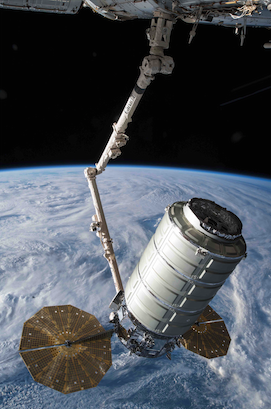

Figura 1: Fonte: NASA. Disponível em: https://www.nasa.gov/mission_pages/station/structure/elements/remote-manipulator-system-canadarm2/. Acesso em: 1 ago. 2021. 

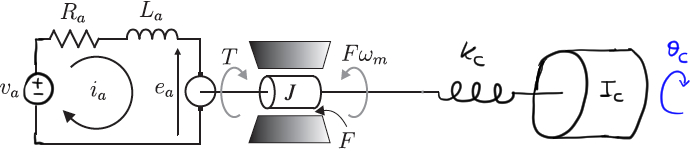

Figura 2: Modelo de um segmento de braço inflável.

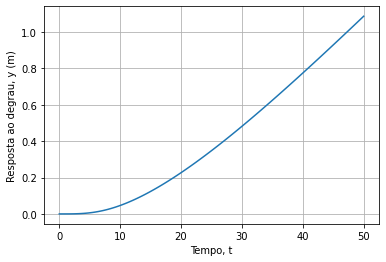

Figura 3: Resposta da degrau: posição angular da carga $y = \theta_c$.

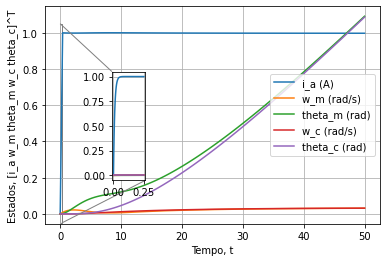

Figura 4: Estados do sistema: corrente do motor $i_a$, velocidade angular do rotor $\omega_m$, posição angular do rotor $\theta_m$, velocidade angular da carga $\omega_c$, posição angular da carga $\theta_c$.

⚡**Resposta Letra A em anexo**

⚡**Resposta Letra B em anexo**

⚡**Resposta Letra C abaixo**

A = [[-1.0e+02 -1.0e+01  0.0e+00  0.0e+00  0.0e+00]
     [ 2.5e-02 -7.5e-01 -2.5e-01  0.0e+00  2.5e-01]
     [ 0.0e+00  1.0e+00  0.0e+00  0.0e+00  0.0e+00]
     [ 0.0e+00  0.0e+00  2.0e-02  0.0e+00 -2.0e-02]
     [ 0.0e+00  0.0e+00  0.0e+00  1.0e+00  0.0e+00]]

B = [[100.]
     [  0.]
     [  0.]
     [  0.]
     [  0.]]

C = [[0. 0. 0. 0. 1.]]

D = [[0.]]



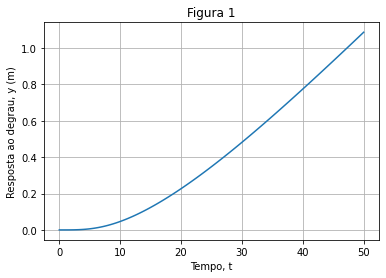

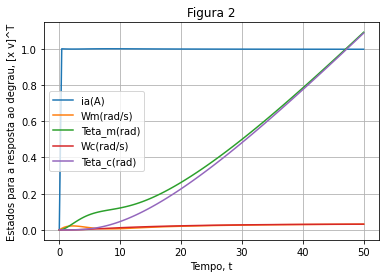

In [12]:
#Importar as bibliotecas necessárias
from numpy import *
from control.matlab import *
import matplotlib.pyplot as plt

#Variáveis conhecidas
Ra =  1.0         #ohms
La = 10*10**-3  #Henry
#Como Ki=Kw=k=0.1
k = 0.1
Kc = 1.0
J = 4.0
F = 3.0
Ic = 50.0

#Montar a matriz
A = matrix([[-Ra/La ,   -k/La,  0   ,  0 ,   0   ],
            [ k/J   ,   -F/J ,-Kc/J ,  0 ,  Kc/J ],
            [ 0     ,     1  ,    0 ,  0 ,    0  ],
            [ 0     ,     0  , Kc/Ic,  0 , -Kc/Ic],
            [ 0     ,     0  ,    0 ,  1 ,    0  ]])
B = matrix([[1/La],
           [  0  ],
           [  0  ],
           [  0  ],
           [  0  ]])
c = matrix([[0, 0, 0, 0, 1]])
d = matrix([0])

#Função de transferência
Hss = ss(A, B, c, d)
print(Hss)        #Imprime a função na tela pra ver se está ok

#Criar o degrau com o tempo de simulação de 50 segundos
y,t,x = step (Hss, T=50, return_x=True)

#Plotar os gráficos
plt.figure(1)
plt.plot(t,y) 
plt.xlabel('Tempo, t') 
plt.ylabel('Resposta ao degrau, y (m)')
plt.title('Figura 1')
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(t,x) 
plt.xlabel('Tempo, t') 
plt.ylabel('Estados para a resposta ao degrau, [x v]^T')
plt.title('Figura 2')
plt.legend(['ia(A)','Wm(rad/s)','Teta_m(rad)','Wc(rad/s)','Teta_c(rad)'])
plt.grid(True)
plt.show()





⚡**Resposta letra D**

A corrente é um degrau, constante. Observando vemos que a dinâmica do sistema da parte eletrica acontece de forma rapida que a dinâmica da parte mecânica do circuito montado. 

Também é possível  notar na curva da velocidade angular da carga e na curva da velocidade angular do motor uma pequena diferença nos pimeiros 10 segundos onde logo em seguida vão ficando semelhantes e se sobrepondo depois de 20 segundos.

As curvas de Wc e Wm também ficam sobrepostas.

